# 상관분석 및 회귀분석 실습

이 노트북에서는 상관분석과 회귀분석을 단계별로 실습합니다. 각 단계마다 설명과 목표가 주어지며, 이를 따라 코드 셀을 완성해보세요.

## 문제 1: 데이터 불러오기

### 설명

먼저, `pandas` 라이브러리를 사용하여 데이터를 불러오고 확인합니다. 이는 데이터를 분석하기 전에 데이터의 구조와 내용을 파악하기 위함입니다.

### 목표

`pandas` 라이브러리를 사용하여 `ch5-1.csv` 파일을 불러오고, 데이터를 확인하십시오. 데이터를 확인하는 방법으로는 `head()` 메서드와 `info()` 메서드를 사용하십시오.

In [2]:
# 판다스 모듈 로딩
import pandas as pd

# 데이터 불러오기
g = pd.read_csv('ch5-1.csv')

# 데이터 확인
print(g.head())
# 데이터 구조 및 자료형 확인
print(g.info())


  chick_nm  weight  egg_weight  movement  food
0      a01     140          65       146    14
1      a02     128          62       153    12
2      a03     140          65       118    13
3      a04     135          65       157    13
4      a05     145          69       157    13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB
None


## 문제 2: 상관분석을 위한 데이터셋 준비

### 설명

상관분석은 숫자 형태의 데이터만 가능하므로 문자형인 첫 번째 열을 제외하고 별도의 데이터셋을 만듭니다. 이렇게 함으로써 상관 분석에 필요한 데이터만을 추출합니다.

### 목표

문자형인 첫 번째 열(`chick_nm`)을 제외하고 숫자형 데이터(`weight`, `egg_weight`, `movement`, `food`)만을 포함하는 새로운 데이터셋을 준비하십시오.

In [3]:
# 여기에 문제 2의 코드를 작성하세요.
# 첫 번째 열을 제외한 데이터셋 준비
# 이름을 제외하고 다른 데이터 셋을 준비 
w_n = g.iloc[:, 1:5]
w_n.head()


,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


## 문제 3: 상관분석 실시

### 설명

`pandas`의 `corr()` 메소드를 사용하여 상관분석을 실시합니다. 이는 변수들 간의 상관관계를 수치적으로 파악하기 위함입니다.

### 목표

`pandas`의 `corr()` 메소드를 사용하여 상관 분석을 수행하고, 상관계수를 출력하십시오. `pearson` 방법을 사용하십시오.

In [4]:
# 여기에 문제 3의 코드를 작성하세요.
# 상관 분석 실시
w_cor = w_n.corr(method='pearson')
w_cor


,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


weight 와 상관관계 순위를 분석하면? 1에 가까울 수록 높은 것
1.egg_weight
2.food
3.movement	

## 문제 4: 상관 분석 결과 시각화

### 설명

`seaborn` 라이브러리를 사용하여 상관 관계를 시각화합니다. 시각화는 데이터를 직관적으로 이해하는 데 도움을 줍니다.

### 목표

1. `seaborn`의 `pairplot()` 함수를 사용하여 상관 관계를 시각화하십시오.
2. `seaborn`의 `heatmap()` 함수를 사용하여 상관 행렬을 히트맵으로 시각화하십시오. 상관계수를 표시하고 색상은 'Blues'를 사용하십시오.

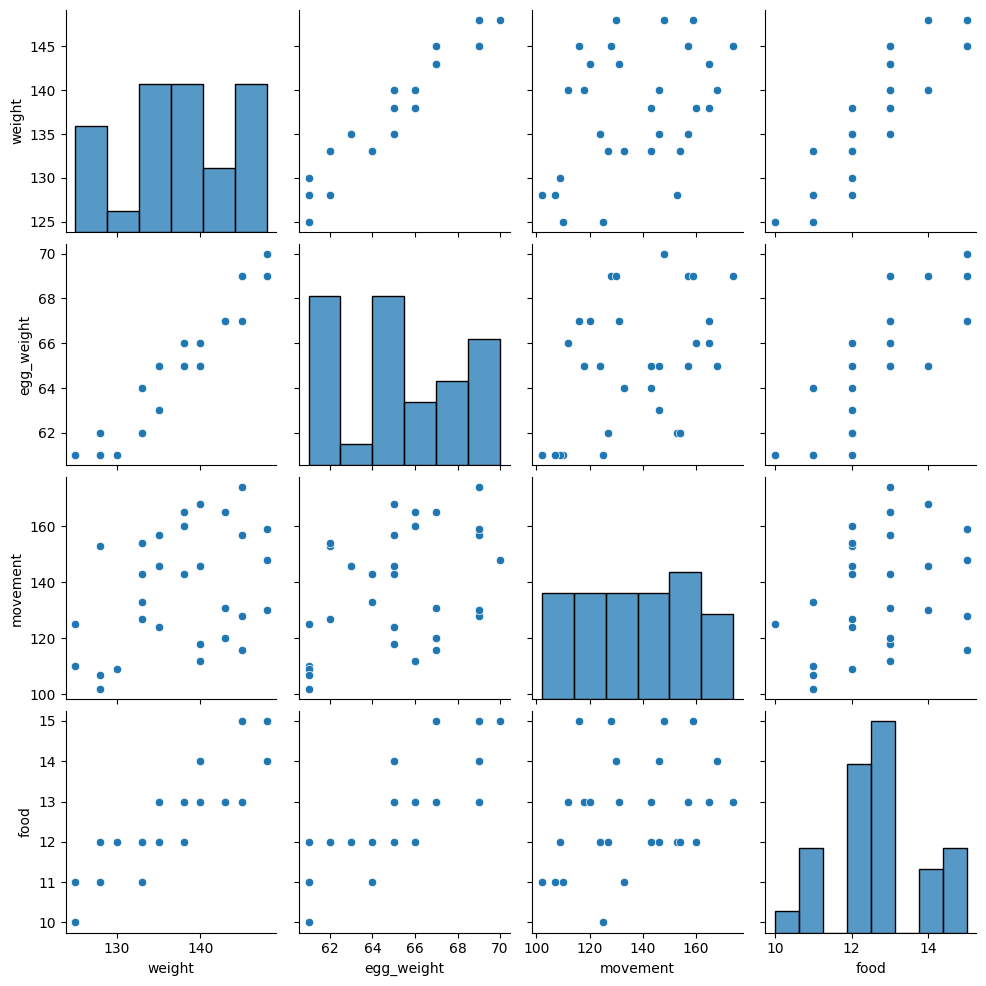

In [5]:
# 여기에 문제 4의 코드를 작성하세요.
# matplotlib, seaborn 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
# 상관 관계 시각화 (산점도 행렬)
sns.pairplot(w_n)
# 상관 행렬도 그리기 (히트맵)


<Axes: >

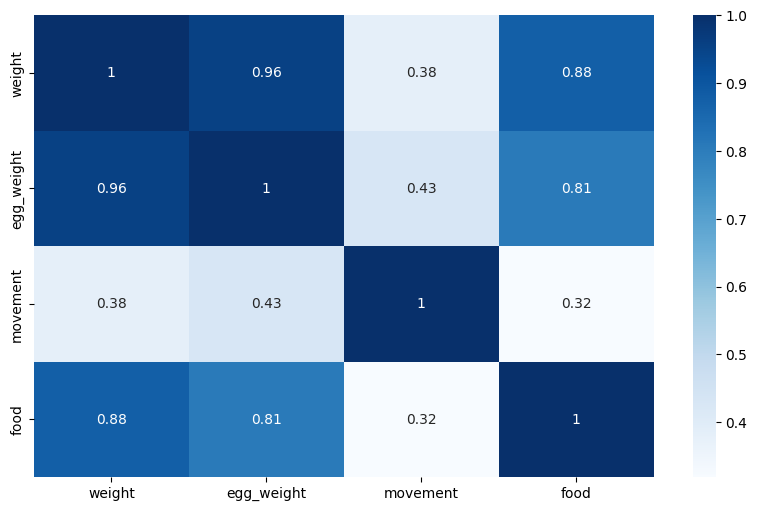

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(w_cor,annot=True,cmap='Blues')

## 문제 5: 단순 선형 회귀분석

### 설명

`statsmodels` 라이브러리의 `ols` 함수를 사용하여 단순 선형 회귀분석을 실시합니다. 이는 종속 변수와 단일 독립 변수 간의 관계를 모델링합니다.


먼저 가장 높은 상관관계를 가지는 egg_weight를 가지고 단순 선형 회귀분석을 합니다.

<span style="color:red">가장 높은 상관관계를 가지는 변수를 가지고 선형 회귀 분석을 합니다</span>


### 목표

<span style="color:red">가장 높은 상관관계 변수로 단순 선형 회귀</span>

`statsmodels`의 `ols` 함수를 사용하여 단순 선형 회귀 모델을 구축하고, 결과를 출력하십시오. 종속 변수는 `weight`, 독립 변수는 <span style="color:red">가장 높은 상관관계 변수 선택</span>하여 진행

In [7]:
# 여기에 문제 5의 코드를 작성하세요.
import statsmodels.formula.api as smf
# 단순 선형 회귀 모델 구축
model_lm = smf.ols(formula= 'weight ~ egg_weight', data=w_n)
# 모델 학습

# 모델 결과 확인
result_lm = model_lm.fit()
result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.32e-16
Time:                        10:28:01   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 문제 6: 단순 선형 회귀분석 결과 시각화

### 설명

회귀분석 결과를 시각화하여 회귀 직선을 추가합니다. 이는 모델이 데이터를 얼마나 잘 설명하는지 시각적으로 평가할 수 있게 합니다.

### 목표

1. `matplotlib`을 사용하여 산점도를 그리십시오. x축은 `egg_weight`, y축은 `weight`입니다.
2. 회귀 직선을 산점도 위에 추가하십시오. 회귀 모델의 식을 그래프에 텍스트로 표시하십시오.

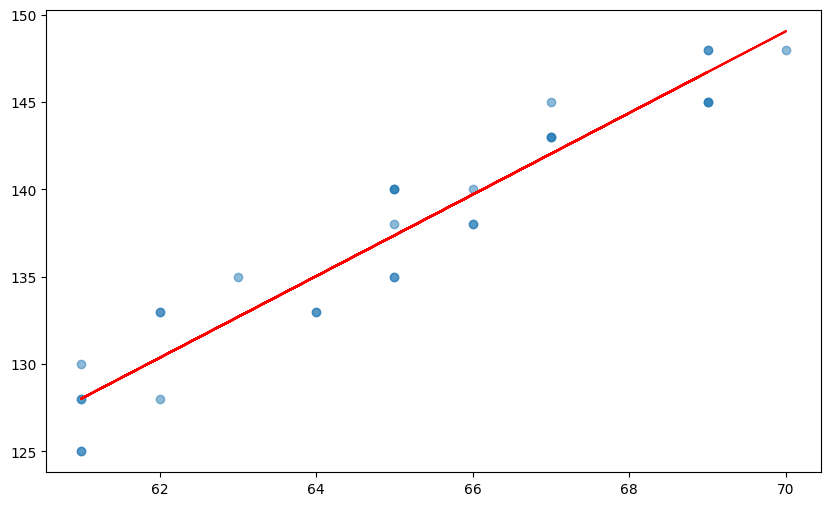

In [8]:
# 여기에 문제 6의 코드를 작성하세요.
# 산점도 및 회귀 직선 그리기
plt.figure(figsize=(10,6))
plt.scatter(g.egg_weight, g.weight, alpha=0.5)
plt.plot(g.egg_weight, g.egg_weight*2.3371 - 14.5475, color = 'red')

## 문제 7: 다중 회귀분석

### 설명

여러 독립 변수를 사용하여 다중 회귀분석을 실시합니다. 이는 종속 변수와 여러 독립 변수 간의 관계를 모델링합니다.

### 목표

`statsmodels`의 `ols` 함수를 사용하여 다중 회귀 모델을 구축하고, 결과를 출력하십시오. 종속 변수는 `weight`, 독립 변수는 `egg_weight`, `food`, `movement`입니다.

In [9]:
# 여기에 문제 7의 코드를 작성하세요.
# 다중 회귀 분석 모델 구축
model_mlm = smf.ols(formula='weight ~ egg_weight + food + movement',data= w_n)

result_mlm = model_mlm.fit()
result_mlm.summary()
# 다중 회귀 분석 결과 확인


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           8.46e-17
Time:                        10:28:02   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model_mlm2 = smf.ols(formula='weight ~ egg_weight + food',data= w_n)

result_mlm2 = model_mlm2.fit()
result_mlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           5.44e-18
Time:                        10:28:02   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 문제 8: 다중 공선성 확인

### 설명

독립 변수 간의 다중 공선성 문제를 확인하기 위해 분산 팽창 요인(VIF)을 계산합니다. 높은 VIF 값은 다중 공선성 문제를 나타내며, 모델의 신뢰성을 저하시킬 수 있습니다.

### 목표

`statsmodels`의 `variance_inflation_factor` 함수를 사용하여 각 독립 변수의 VIF 값을 계산하고 출력하십시오.

In [11]:
# 여기에 문제 8의 코드를 작성하세요.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀 모델 변수 명 속성 확인
print(model_mlm.exog_names)

# 1번째 변수 (egg_weight) VIF 계산
vif1 = variance_inflation_factor(model_mlm.exog, 1)

# 2번째 변수 (food) VIF 계산
vif2 = variance_inflation_factor(model_mlm.exog, 2)

print(vif1, vif2)

['Intercept', 'egg_weight', 'food', 'movement']
3.17905940457344 2.8901633412791043


## 문제 9: 다중 회귀분석 결과 시각화

### 설명

잔차(residual)의 히스토그램을 그려서 모델의 성능을 평가합니다. 잔차가 정규분포를 따른다면 모델이 데이터를 잘 설명한다고 할 수 있습니다.

### 목표

1. `matplotlib`을 사용하여 잔차의 히스토그램을 그리십시오.
2. 히스토그램의 x축에는 잔차 값, y축에는 빈도를 표시하십시오.

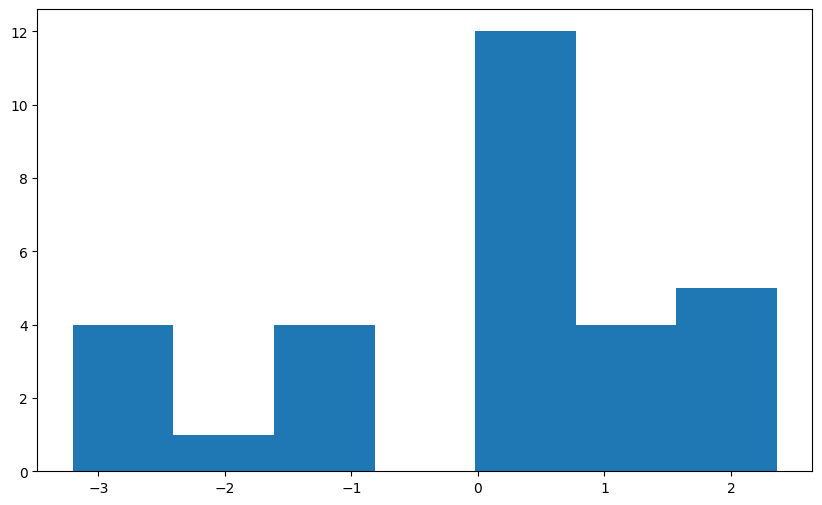

In [12]:
# 여기에 문제 9의 코드를 작성하세요.
# 잔차 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(result_mlm.resid, bins=7)
plt.show()